## Inicializacion de entorno

In [ ]:
 # importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [ ]:
!pip install PyDrive
!pip install pandas-profiling==2.7.1

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

##Carga y optimizacion de datos

Descargo archivos

In [ ]:
id='1nt1ABcWS_-jC_CH2HF3Hrcgbso244DWO'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

In [ ]:
id='1CjCIE18Tc7iI5J4dTnzXY1dKQzqMnalR'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

Asignamos tipos de datos en la lectura de archivos para luego hacer un merge óptimo.

In [ ]:
train_labels = pd.read_csv('train_labels.csv')

In [ ]:
train_values = pd.read_csv('train_values.csv', dtype= {'land_surface_condition':'category','foundation_type':'category','roof_type':'category','ground_floor_type':'category' \
, 'other_floor_type':'category', 'position':'category','plan_configuration':'category','damage_grade':'category','legal_ownership_status':'category','has_secondary_use':'int8'\
,'has_superstructure_adobe_mud': 'int8'\
, 'has_superstructure_mud_mortar_stone': 'int8','has_superstructure_stone_flag': 'int8','has_superstructure_cement_mortar_stone': 'int8','has_superstructure_mud_mortar_brick': 'int8'\
, 'has_superstructure_cement_mortar_brick': 'int8', 'has_superstructure_timber': 'int8', 'has_superstructure_bamboo': 'int8', 'has_superstructure_rc_non_engineered': 'int8', 'has_superstructure_rc_engineered': 'int8'\
, 'has_superstructure_other': 'int8', 'has_secondary_use': 'int8', 'has_secondary_use_agriculture': 'int8', 'has_secondary_use_hotel': 'int8', 'has_secondary_use_rental': 'int8', 'has_secondary_use_institution': 'int8'\
, 'has_secondary_use_school': 'int8', 'has_secondary_use_industry': 'int8', 'has_secondary_use_health_post': 'int8', 'has_secondary_use_gov_office': 'int8', 'has_secondary_use_use_police': 'int8', 'has_secondary_use_other': 'int8'})


In [ ]:
full = train_values.merge(train_labels, how='inner')
full.memory_usage().sum() / (1024*1024) # Logramos reducir de 81MB --> 29,3MB

29.327795028686523

In [ ]:
full.sample(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
219085,740501,20,788,9253,2,15,10,5,t,r,q,f,q,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
51107,1024624,9,445,7154,2,0,12,5,t,u,q,v,x,t,d,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
104707,906182,10,1074,2382,2,5,6,4,t,u,n,x,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,3
109969,25998,17,303,9995,3,0,8,8,n,r,q,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
118095,528953,3,1387,925,5,5,21,15,t,i,x,v,s,t,d,0,0,0,0,0,0,0,0,0,1,0,v,1,1,0,1,0,0,0,0,0,0,0,0,2
6240,153145,6,1170,3236,2,20,8,7,n,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,2,0,0,0,0,0,0,0,0,0,0,0,2
179202,392494,17,1149,5807,3,15,10,7,t,r,n,f,q,t,d,0,1,0,0,0,0,1,1,0,0,0,v,1,1,0,1,0,0,0,0,0,0,0,0,3
43236,162699,8,172,7334,2,15,7,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
126872,372190,10,1140,2887,2,20,5,7,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
212494,722818,20,943,6700,1,10,2,3,t,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
full.info() # no hay elementos nulos en todo el dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [ ]:
full.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,"260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00"
mean,"525,675.48",13.90,701.07,"6,257.88",2.13,26.54,8.02,5.43,0.09,0.76,0.03,0.02,0.07,0.08,0.25,0.09,0.04,0.02,0.01,0.98,0.11,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,2.24
std,"304,545.00",8.03,412.71,"3,646.37",0.73,73.57,4.39,1.92,0.28,0.43,0.18,0.13,0.25,0.26,0.44,0.28,0.20,0.12,0.12,0.42,0.32,0.25,0.18,0.09,0.03,0.02,0.03,0.01,0.01,0.01,0.07,0.61
min,4.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"261,190.00",7.00,350.00,"3,073.00",2.00,10.00,5.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,"525,757.00",12.00,702.00,"6,270.00",2.00,15.00,7.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
75%,"789,762.00",21.00,"1,050.00","9,412.00",2.00,30.00,9.00,6.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,"1,052,934.00",30.00,"1,427.00","12,567.00",9.00,995.00,100.00,32.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00


## Reporte Perfilado de Pandas

In [ ]:
#ProfileReport(full)

##Exploracion de datos

In [ ]:
full.building_id.is_unique

True

In [ ]:
full.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

###Exploracion datos numericos

In [ ]:
numerical_columns = ['age','count_floors_pre_eq', 'area_percentage', 'height_percentage']
full[numerical_columns].describe()

,age,count_floors_pre_eq,area_percentage,height_percentage
count,"260,601.00","260,601.00","260,601.00","260,601.00"
mean,26.54,2.13,8.02,5.43
std,73.57,0.73,4.39,1.92
min,0.00,1.00,1.00,2.00
25%,10.00,2.00,5.00,4.00
50%,15.00,2.00,7.00,5.00
75%,30.00,2.00,9.00,6.00
max,995.00,9.00,100.00,32.00


In [ ]:
full.count_floors_pre_eq.value_counts().sort_values(ascending=False)

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

###Exploracion datos categoricos

In [ ]:
full.sample(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
126581,974528,26,886,9266,2,15,4,5,t,w,n,f,j,s,d,0,0,0,0,0,0,1,0,0,0,0,v,2,0,0,0,0,0,0,0,0,0,0,0,1
194212,571964,13,213,111,2,10,7,6,t,r,q,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
186117,546540,26,36,5318,1,10,7,4,t,r,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,1,0,1,0,0,0,0,0,0,0,0,1
182899,622822,7,1265,9455,2,20,9,5,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
181884,474832,9,713,9605,2,10,12,6,t,i,n,x,s,s,d,0,0,0,0,0,1,0,0,1,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
categorias = full.loc[:,['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type',\
'position','plan_configuration','legal_ownership_status']]
categorias.sample(5)

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
155770,t,u,q,x,s,j,d,v
36253,t,r,q,f,j,s,d,v
258901,t,r,n,f,j,s,d,v
180728,t,r,n,f,q,t,d,v
254325,t,r,n,f,j,s,d,v


In [ ]:
categorias.land_surface_condition.value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [ ]:
categorias.foundation_type.value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [ ]:
categorias.roof_type.value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

In [ ]:
categorias.ground_floor_type.value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

In [ ]:
categorias.other_floor_type.value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [ ]:
categorias.position.value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

In [ ]:
categorias.plan_configuration.value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [ ]:
categorias.legal_ownership_status.value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

## Distribuciones importantes

###Distribucion del grado de daño a edificios

In [ ]:
distribucion_daño = train_labels['damage_grade'].value_counts()
distribucion_daño

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

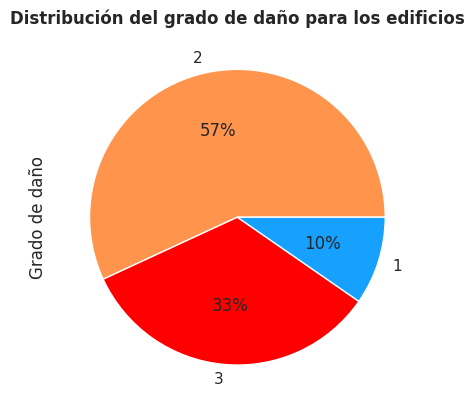

In [ ]:
f = plt.figure()
plt.title('Distribución del grado de daño para los edificios', {'fontweight':'bold'})

distribucion_daño.plot(kind='pie', ax=f.gca(), ylabel='Grado de daño', colors=['#ff944d','red','#16a1ff'], autopct='%1.0f%%')

plt.savefig('damage_pie.pdf', bbox_inches='tight')

###Distribucion de edad de los edificios

In [ ]:
antiguedad_filtrada2 = train_values[train_values['age']<150] # Filtramos edificios con edades mayores a 150 años ya que consideramos esos datos como ambigüos para nuestro análisis.
antiguedad_filtrada2['age'].value_counts()                   # Especial hincapié en edificios con edad '995 años', el cual corresponde a un dato no certero. 

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
110      100
105       89
125       37
115       21
140        9
130        9
135        5
145        3
Name: age, dtype: int64

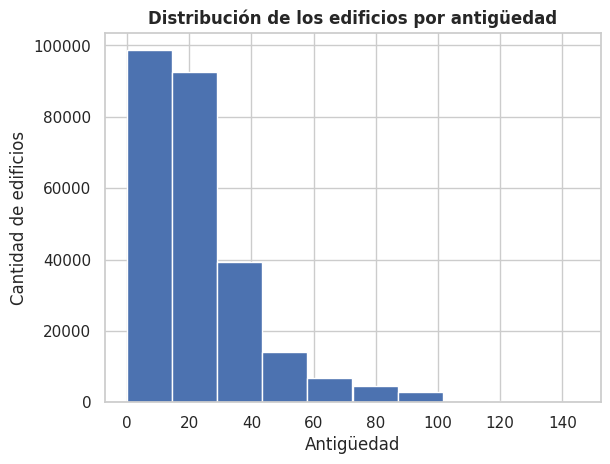

In [ ]:
f = plt.figure()
plt.tight_layout()
plt.title("Distribución de los edificios por antigüedad", {'fontweight':'bold'})
antiguedad_filtrada2['age'].plot(kind='hist', ax=f.gca())
plt.ylabel("Cantidad de edificios")
plt.xlabel("Antigüedad")
plt.savefig("edificios_antiguedad.pdf")

### Distribucion de los materiales y grado de daño recibidos

Distribucion total de los materiales

In [ ]:
materials = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
                              'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                              'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
                              'has_superstructure_other']                             

In [ ]:
materials_es = ['Adobe and mud', 'Mud and Stone', 'Stone',
                              'Cement and Stone', 'Mud and Brick', 'Cement and Brick',
                              'Timber', 'Bamboo', 'RC non enrineered', 'RC engineered',
                              'Other']

In [ ]:
distribucion_materiales = full.loc[:,materials].mean()
distribucion_materiales.index = materials_es
distribucion_materiales

Adobe and mud                       0.09
Mud and Stone                       0.76
Stone                               0.03
Cement and Stone                    0.02
Mud and Brick                       0.07
Cement and Brick                    0.08
Timber                              0.25
Bamboo                              0.09
RC non enrineered                   0.04
RC engineered                       0.02
Other                               0.01
dtype: float64

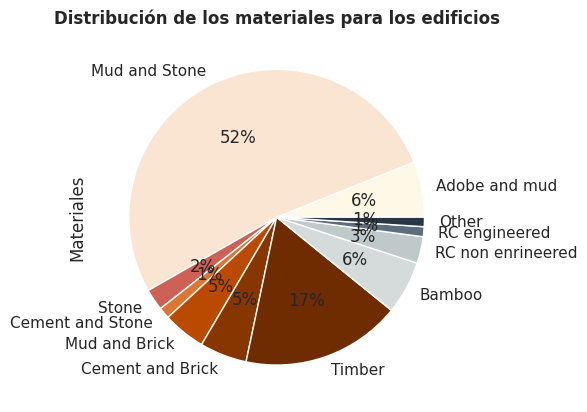

In [ ]:
f = plt.figure()
plt.title('Distribución de los materiales para los edificios', {'fontweight':'bold'})

distribucion_materiales.plot(kind='pie', ax=f.gca(), ylabel='Materiales', colors=['#FEF9E7','#FAE5D3','#CD6155','#DC7633','#BA4A00','#873600','#6E2C00','#D5DBDB','#BFC9CA','#5D6D7E','#273746'], autopct='%1.0f%%')

plt.savefig('materiales_distribucion.pdf', bbox_inches='tight')

Para todos los materiales se puede encontrar una tendencia de acuerdo al daño

In [ ]:
full.loc[full['has_superstructure_adobe_mud'] & (full['damage_grade']==1)]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
643,306848,5,1418,11670,1,20,8,3,t,r,n,f,j,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
660,1050374,20,173,3258,2,0,7,4,t,w,q,f,x,s,u,1,0,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
1106,453197,13,480,12455,2,10,5,5,t,r,n,f,q,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
1299,87974,13,480,1917,2,30,13,5,t,r,n,f,q,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
1442,180268,15,668,3329,1,10,5,3,n,r,n,f,j,s,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258083,49776,13,480,7457,2,20,7,5,t,r,n,f,q,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
258370,541206,20,173,1199,1,0,4,3,t,w,q,f,j,s,d,1,0,0,0,0,0,1,1,0,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0,1
258681,773391,10,310,6799,2,5,4,4,t,r,n,f,q,t,d,1,0,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
259994,711529,24,628,10591,2,10,11,5,o,r,n,f,q,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
(full['damage_grade']==1).value_counts()

False    235477
True      25124
Name: damage_grade, dtype: int64

In [ ]:
materials_per_damage = full.groupby('damage_grade')[['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
                              'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                              'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
                              'has_superstructure_other']].mean()

In [ ]:
materials_per_damage

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
1,0.02,0.35,0.01,0.03,0.02,0.28,0.30,0.11,0.15,0.11,0.03
2,0.09,0.77,0.03,0.02,0.08,0.08,0.27,0.09,0.04,0.01,0.02
3,0.10,0.87,0.05,0.01,0.06,0.01,0.21,0.06,0.02,0.00,0.01


In [ ]:
materials_df = pd.DataFrame(index = materials_per_damage.index)

for i, material in enumerate(materials):
  material_distribution = full.loc[full[material]==1].groupby([material, 'damage_grade'])[['damage_grade']].count()['damage_grade']
  material_distribution = material_distribution / material_distribution.sum() *100
  materials_df[materials_es[i]] = material_distribution.values

materials_df

,Adobe and mud,Mud and Stone,Stone,Cement and Stone,Mud and Brick,Cement and Brick,Timber,Bamboo,RC non enrineered,RC engineered,Other
damage_grade,,,,,,,,,,,
1,2.57,4.41,2.03,17.45,3.51,36.22,11.50,12.81,34.75,64.26,16.80
2,60.18,57.39,50.68,68.35,65.86,58.23,60.48,63.20,52.55,33.92,57.57
3,37.25,38.20,47.29,14.20,30.63,5.55,28.02,23.99,12.70,1.81,25.63


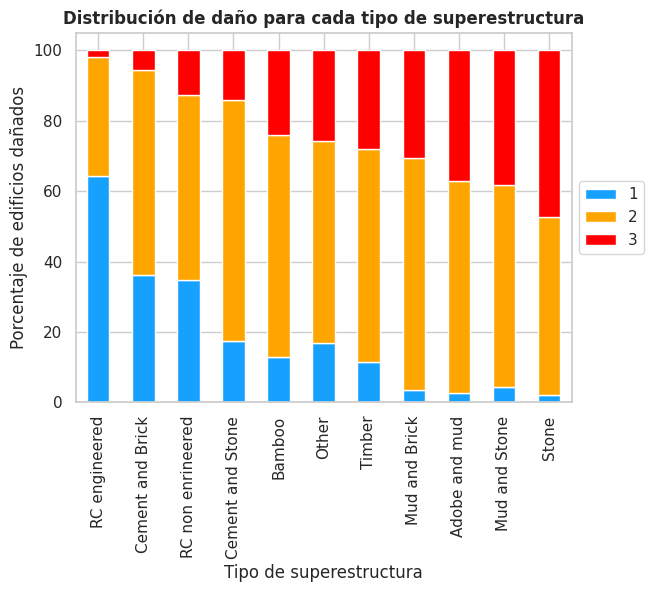

In [ ]:
f = plt.figure()
plt.title('Distribución de daño para cada tipo de superestructura' , {'fontweight':'bold'})

materials_df.transpose().sort_values(by=[3]).plot(kind='bar', ax=f.gca(), xlabel='Tipo de superestructura', ylabel='Porcentaje de edificios dañados', color=['#16a1ff', 'orange', 'red'], stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.show()
plt.savefig('materials.pdf', bbox_inches='tight')


In [ ]:
adobe_mud = full.loc[full['has_superstructure_adobe_mud']==1].groupby(['has_superstructure_adobe_mud', 'damage_grade'])[['damage_grade']].count()['damage_grade']
adobe_mud = adobe_mud / adobe_mud.sum()
adobe_mud.values

array([0.02571317, 0.60179213, 0.3724947 ])

###Distribucion de daño para zonas geograficas

In [ ]:
train_values['geo_level_1_id'].value_counts()

6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: geo_level_1_id, dtype: int64

In [ ]:
full[['geo_level_1_id', 'damage_grade']]

,geo_level_1_id,damage_grade
0,6,3
1,8,2
2,21,3
3,22,2
4,11,3
...,...,...
260596,25,2
260597,17,3
260598,17,3
260599,26,2


NECESITAMOS OBTENER EL PROMEDIO PARA CADA CELDA. SERIA EL VALOR ACTUAL DIVIDIDO POR LA SUMATORIA DE LOS VALORES EN ESA FILA

In [ ]:
damage_per_zone = full[['geo_level_1_id', 'damage_grade', 'building_id']].pivot_table(index='damage_grade', columns='geo_level_1_id', aggfunc='count')

In [ ]:
damage_per_zone.columns = damage_per_zone.columns.get_level_values(1)

In [ ]:
damage_per_zone

geo_level_1_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
damage_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,337.00,411.00,85.00,245.00,521.00,446.00,"2,108.00","1,033.00",654.00,561.00,"1,211.00",386.00,199.00,"1,966.00",191.00,163.00,200.00,285.00,72.00,43.00,"3,311.00",322.00,811.00,72.00,270.00,468.00,"8,028.00",465.00,nan,8.00,252.00
2,"3,075.00","1,985.00",610.00,"4,550.00","11,164.00","2,014.00","16,222.00","11,273.00","8,513.00","2,733.00","12,107.00","4,672.00","2,310.00","6,275.00","1,247.00","1,673.00","3,188.00","3,913.00",786.00,263.00,"11,860.00","5,857.00","4,624.00",768.00,908.00,"4,384.00","12,645.00","6,007.00",157.00,349.00,"2,127.00"
3,599.00,305.00,236.00,"2,745.00","2,883.00",230.00,"6,051.00","6,688.00","9,913.00",664.00,"8,761.00","3,162.00",685.00,"1,367.00",276.00,484.00,944.00,"17,615.00","2,331.00",66.00,"2,045.00","8,710.00",817.00,281.00,132.00,772.00,"1,942.00","6,060.00",108.00,39.00,307.00


In [ ]:
mean_damage = pd.DataFrame(index = damage_per_zone.index)

In [ ]:
for columna in damage_per_zone.columns:
  mean_damage[columna] = damage_per_zone[columna] / damage_per_zone[columna].sum() *100

In [ ]:
mean_damage

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
damage_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8.40,15.22,9.13,3.25,3.58,16.58,8.65,5.44,3.43,14.17,5.48,4.70,6.23,20.46,11.14,7.03,4.62,1.31,2.26,11.56,19.23,2.16,12.97,6.42,20.61,8.32,35.50,3.71,nan,2.02,9.38
2,76.66,73.49,65.52,60.34,76.63,74.87,66.54,59.35,44.62,69.05,54.83,56.84,72.32,65.31,72.75,72.11,73.59,17.94,24.65,70.70,68.89,39.34,73.96,68.51,69.31,77.95,55.91,47.93,59.25,88.13,79.19
3,14.93,11.29,25.35,36.41,19.79,8.55,24.82,35.21,51.95,16.78,39.68,38.47,21.45,14.23,16.10,20.86,21.79,80.75,73.10,17.74,11.88,58.50,13.07,25.07,10.08,13.73,8.59,48.36,40.75,9.85,11.43


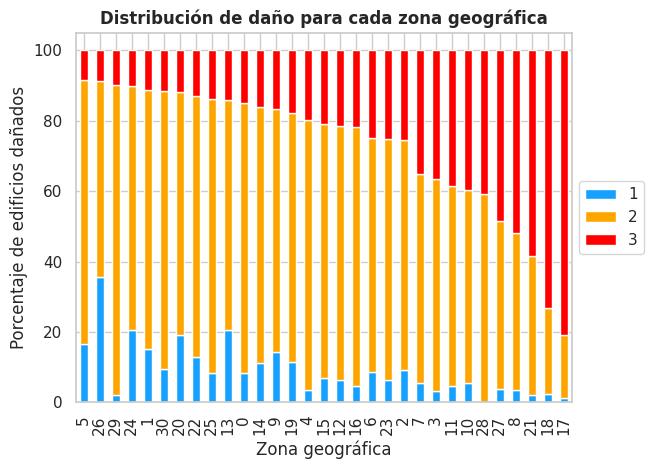

In [ ]:
f = plt.figure()
plt.title('Distribución de daño para cada zona geográfica' , {'fontweight':'bold'})

mean_damage.transpose().sort_values(by=[3]).plot(kind='bar', ax=f.gca(), xlabel='Zona geográfica', ylabel='Porcentaje de edificios dañados', color=['#16a1ff', 'orange', 'red'], stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.show()
plt.savefig('zones_more_affected.pdf', bbox_inches='tight')

##Relaciones con damage_grade

### Numero de pisos

In [ ]:
full['count_floors_pre_eq'].value_counts() # Ecuacion mas peligrosa de la historia: descartamos edificios mayores a 3 pisos

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

In [ ]:
edificios_menores_seis_pisos = full[(full['count_floors_pre_eq'] < 4)]
edificios_menores_seis_pisos['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
Name: count_floors_pre_eq, dtype: int64

In [ ]:
edificios_menores_seis_pisos.groupby('count_floors_pre_eq')['damage_grade'].value_counts().sort_values(ascending=False)

count_floors_pre_eq  damage_grade
2                    2               93968
                     3               50062
3                    2               28479
                     3               24601
1                    2               20798
2                    1               12593
1                    3               10674
                     1                8969
3                    1                2537
Name: damage_grade, dtype: int64

Vemos que edificios sufrieron un mayor grado de daño con respecto a su numero de pisos.

In [ ]:
promedio_daño_por_pisos = edificios_menores_seis_pisos.groupby('count_floors_pre_eq')['damage_grade'].mean()
promedio_daño_por_pisos #conclucion: ligero incremento de daño en edificios mas altos.

count_floors_pre_eq
1                   2.04
2                   2.24
3                   2.40
Name: damage_grade, dtype: float64

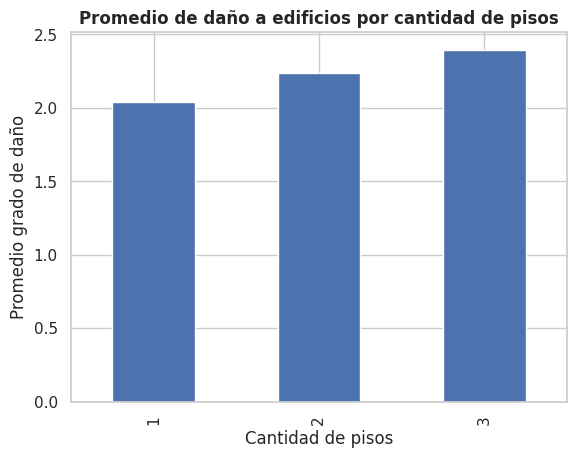

In [ ]:
f = plt.figure()
plt.title('Promedio de daño a edificios por cantidad de pisos', {'fontweight':'bold'})

promedio_daño_por_pisos.plot(kind='bar', ax=f.gca(), ylabel='Promedio grado de daño', xlabel='Cantidad de pisos')

plt.savefig('pisos.pdf', bbox_inches='tight')

Ahora vamos a evaluar el promedio de pisos para cada grado de daño

In [ ]:
#means_antiguedad = full[full['age']<150].groupby('damage_grade')[numerical_columns].mean()
means = full.groupby('damage_grade')[numerical_columns].mean()

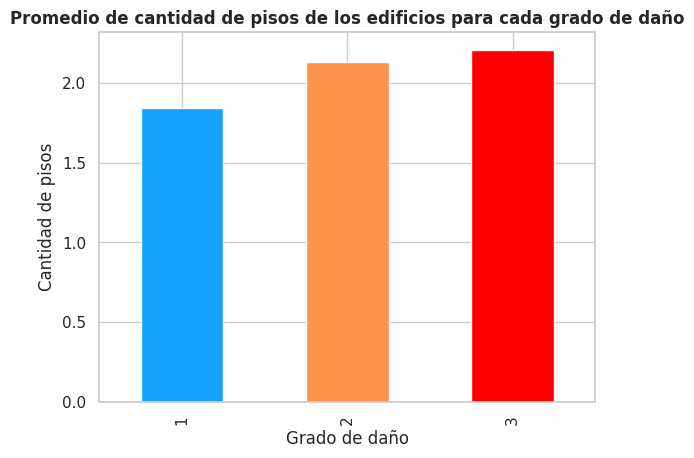

In [ ]:
f = plt.figure()
plt.title('Promedio de cantidad de pisos de los edificios para cada grado de daño', {'fontweight':'bold'})
 
means['count_floors_pre_eq'].plot(kind='bar', ax=f.gca(),color=['#16a1ff', '#ff944d', 'red'], ylabel='Cantidad de pisos', xlabel='Grado de daño')
 
plt.savefig('floors.pdf', bbox_inches='tight')

###Condicion de superficie terrestre

In [ ]:
full['land_surface_condition'].value_counts() ## Ecuacion mas peligrosa de la Historia: suficientes datos para poder evaluar

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [ ]:
daño_por_cond_superficie = full.groupby('land_surface_condition')['damage_grade'].mean().sort_values(ascending=False)
daño_por_cond_superficie #conclucion: condicion superficie terrestre no es relevante

land_surface_condition
o                   2.29
n                   2.25
t                   2.23
Name: damage_grade, dtype: float64

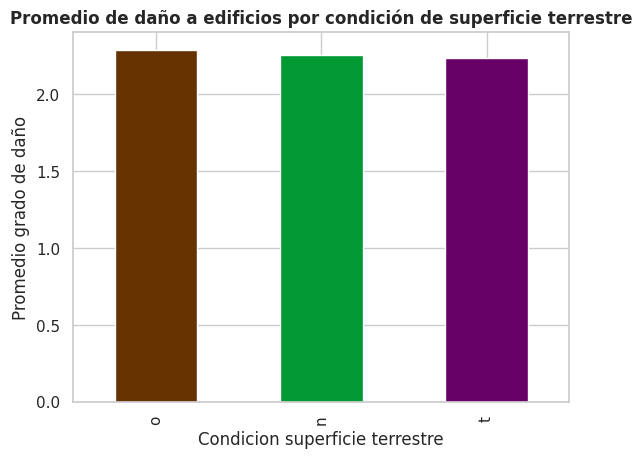

In [ ]:
f = plt.figure()
plt.title('Promedio de daño a edificios por condición de superficie terrestre', {'fontweight':'bold'})

daño_por_cond_superficie.plot(kind='bar', ax=f.gca(),color=['#663300', '#009933', '#660066'], ylabel='Promedio grado de daño', xlabel='Condicion superficie terrestre')

plt.savefig('superficie.pdf', bbox_inches='tight')

###Tipo de cimientos 

In [ ]:
full['foundation_type'].value_counts() ## Ecuacion mas peligrosa de la Historia: descartamos h

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [ ]:
tipo_de_cimientos_filtrado = full[(full['foundation_type'] != 'h')]
tipo_de_cimientos_filtrado['foundation_type'] = tipo_de_cimientos_filtrado.foundation_type.cat.remove_unused_categories()
tipo_de_cimientos_filtrado['foundation_type'].value_counts() 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


r    219196
w     15118
u     14260
i     10579
Name: foundation_type, dtype: int64

In [ ]:
daño_por_tipo_de_cimientos = tipo_de_cimientos_filtrado.groupby('foundation_type')['damage_grade'].mean().sort_values(ascending=False)
daño_por_tipo_de_cimientos #conclucion: tipo de cimiento r sufrio daños considerablementes mayores, podemos ver que el cimiento i fue el mas resistente.

foundation_type
r                   2.33
u                   1.88
w                   1.81
i                   1.45
Name: damage_grade, dtype: float64

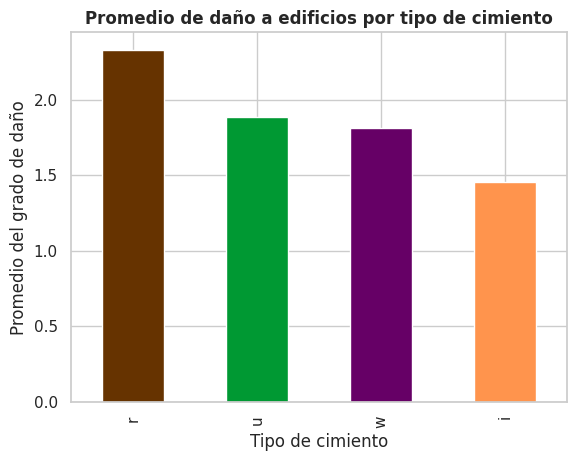

In [ ]:
f = plt.figure()
plt.title('Promedio de daño a edificios por tipo de cimiento', {'fontweight':'bold'})

daño_por_tipo_de_cimientos.plot(kind='bar', ax=f.gca(),color=['#663300', '#009933', '#660066', '#ff944d'], ylabel='Promedio del grado de daño', xlabel='Tipo de cimiento')

plt.savefig('cimiento.pdf', bbox_inches='tight')

### Tipo de techo


In [ ]:
full['roof_type'].value_counts() ## Ecuacion mas peligrosa de la Historia: suficientes datos para poder evaluar

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

In [ ]:
daño_por_tipo_de_techo = full.groupby('roof_type')['damage_grade'].mean().sort_values(ascending=False)
daño_por_tipo_de_techo # Conclucion: los tipos de techo x son mas resistentes

roof_type
q                   2.32
n                   2.27
x                   1.57
Name: damage_grade, dtype: float64

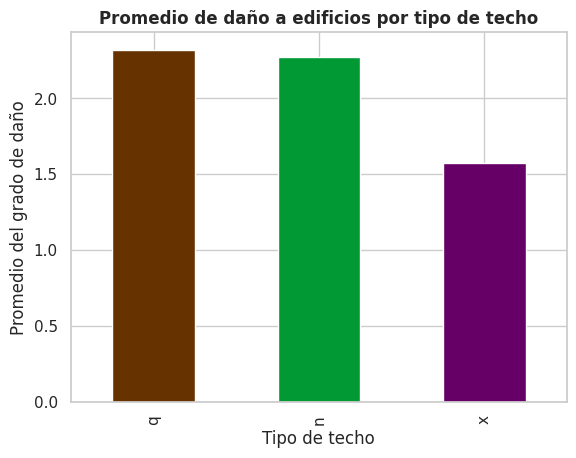

In [ ]:
f = plt.figure()
plt.title('Promedio de daño a edificios por tipo de techo', {'fontweight':'bold'})

daño_por_tipo_de_techo.plot(kind='bar', ax=f.gca(),color=['#663300', '#009933', '#660066'], ylabel='Promedio del grado de daño', xlabel='Tipo de techo')

plt.savefig('techo.pdf', bbox_inches='tight')

### Tipo de construccion en planta baja

In [ ]:
full['ground_floor_type'].value_counts() # Descartamos z y m

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

In [ ]:
tipo_planta_baja = full[(full['ground_floor_type'] != 'z')]
tipo_planta_baja = tipo_planta_baja[(tipo_planta_baja['ground_floor_type'] != 'm')]
tipo_planta_baja['ground_floor_type'] = tipo_planta_baja.ground_floor_type.cat.remove_unused_categories()
tipo_planta_baja['ground_floor_type'].value_counts()

f    209619
x     24877
v     24593
Name: ground_floor_type, dtype: int64

In [ ]:
tipo_planta_baja_ordenado = tipo_planta_baja.groupby('ground_floor_type')['damage_grade'].mean().sort_values(ascending=False)
tipo_planta_baja_ordenado #Conclucion: el tipo de construccion en planta baja v es el mas resistente

ground_floor_type
f                   2.31
x                   2.25
v                   1.63
Name: damage_grade, dtype: float64

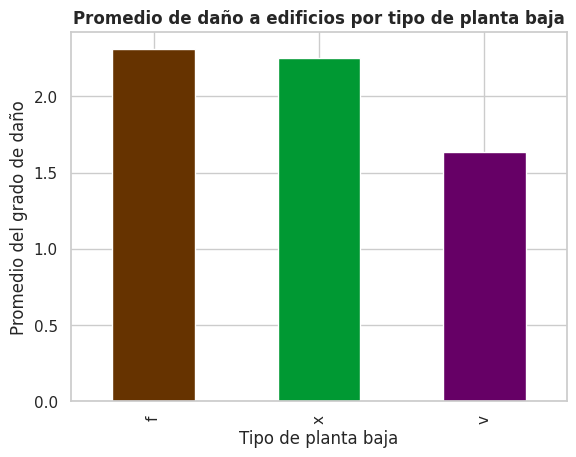

In [ ]:
f = plt.figure()
plt.title('Promedio de daño a edificios por tipo de planta baja', {'fontweight':'bold'})

tipo_planta_baja_ordenado.plot(kind='bar', ax=f.gca(),color=['#663300', '#009933', '#660066'], ylabel='Promedio del grado de daño', xlabel='Tipo de planta baja')

plt.savefig('planta_baja.pdf', bbox_inches='tight')

### Orientacion del edificio

In [ ]:
full['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

In [ ]:
daño_por_orientacion = full.groupby('position')['damage_grade'].mean().sort_values(ascending=False)
daño_por_orientacion # conclucion: no es relevante

position
t                   2.31
s                   2.23
o                   2.21
j                   2.15
Name: damage_grade, dtype: float64

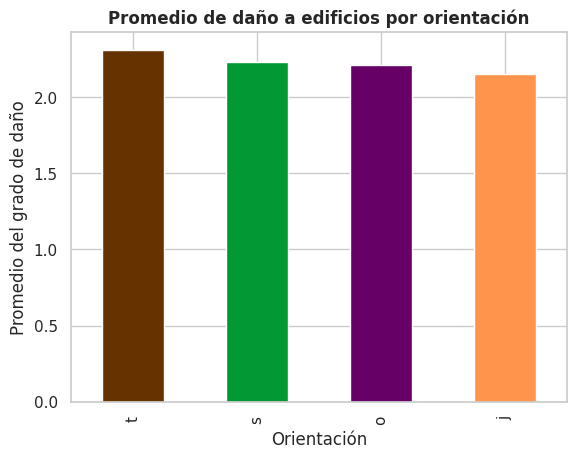

In [ ]:
f = plt.figure()
plt.title('Promedio de daño a edificios por orientación', {'fontweight':'bold'})

daño_por_orientacion.plot(kind='bar', ax=f.gca(),color=['#663300', '#009933', '#660066', '#ff944d'], ylabel='Promedio del grado de daño', xlabel='Orientación')

plt.savefig('orientacion.pdf', bbox_inches='tight')

### Configuración de los planos del edificio

In [ ]:
full['plan_configuration'].value_counts() # Filtro m, n y f.

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [ ]:
daño_por_plan_configuration = full[(full['plan_configuration'] != 'm')]
daño_por_plan_configuration = daño_por_plan_configuration[(daño_por_plan_configuration['plan_configuration'] != 'n')]
daño_por_plan_configuration = daño_por_plan_configuration[(daño_por_plan_configuration['plan_configuration'] != 'f')]
daño_por_plan_configuration['plan_configuration'] = daño_por_plan_configuration.plan_configuration.cat.remove_unused_categories()
daño_por_plan_configuration['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
Name: plan_configuration, dtype: int64

In [ ]:
daño_por_plan_configuration_ordenado = daño_por_plan_configuration.groupby('plan_configuration')['damage_grade'].mean().sort_values(ascending=False)
daño_por_plan_configuration_ordenado

plan_configuration
q                   2.27
d                   2.24
s                   2.05
u                   1.92
o                   1.89
a                   1.85
c                   1.84
Name: damage_grade, dtype: float64

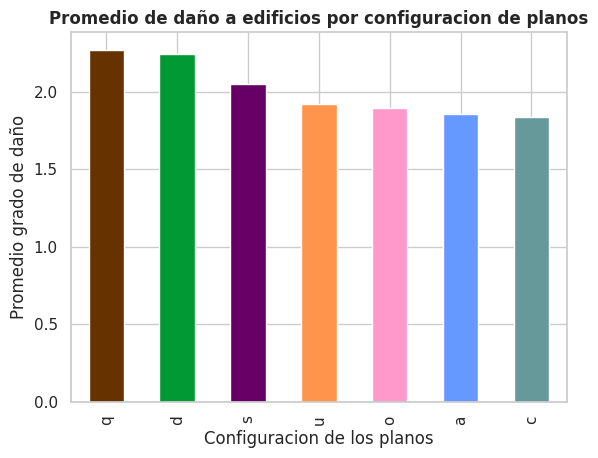

In [ ]:
f = plt.figure()
plt.title('Promedio de daño a edificios por configuracion de planos', {'fontweight':'bold'})

daño_por_plan_configuration_ordenado.plot(kind='bar', ax=f.gca(),color=['#663300', '#009933', '#660066', '#ff944d', '#ff99cc', '#6699ff', '#669999'], ylabel='Promedio grado de daño', xlabel='Configuracion de los planos')

plt.savefig('plan_configuration.pdf', bbox_inches='tight')

### Tipo de construccion en otros pisos

In [ ]:
full['other_floor_type'].value_counts() # No es necesario filtrar

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [ ]:
daño_por_tipo_de_construccion_otros_pisos = full.groupby('other_floor_type')['damage_grade'].mean().sort_values(ascending=False)
daño_por_tipo_de_construccion_otros_pisos # conclucion: cuando construyendo con los pisos q y x hubo un mayor daño.

other_floor_type
q                   2.32
x                   2.30
j                   2.04
s                   1.61
Name: damage_grade, dtype: float64

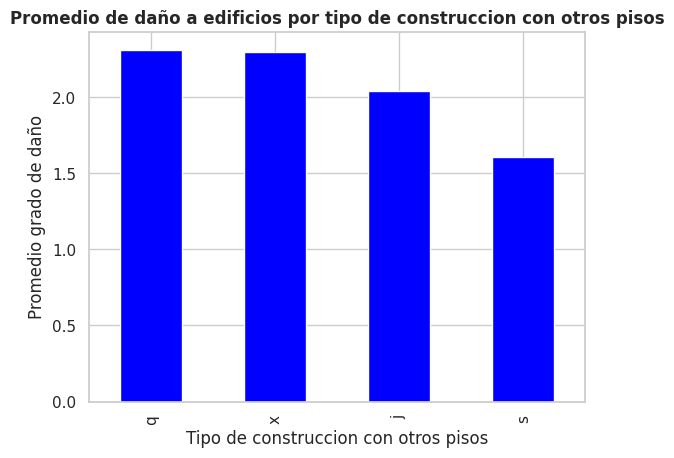

In [ ]:
f = plt.figure()
plt.title('Promedio de daño a edificios por tipo de construccion con otros pisos', {'fontweight':'bold'})

daño_por_tipo_de_construccion_otros_pisos.plot(kind='bar', ax=f.gca(),color=['blue'], ylabel='Promedio grado de daño', xlabel='Tipo de construccion con otros pisos')

plt.savefig('construccion_otros_pisos.pdf', bbox_inches='tight')

### Altura de los edificios 

In [ ]:
numerical_columns = ['age','count_floors_pre_eq', 'area_percentage', 'height_percentage']

In [ ]:
#means_antiguedad = full[full['age']<150].groupby('damage_grade')[numerical_columns].mean()
#means = full.groupby('damage_grade')[numerical_columns].mean()

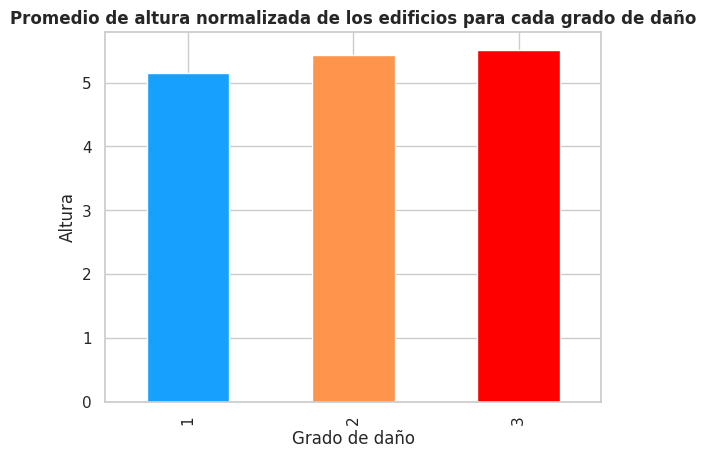

In [ ]:
f = plt.figure()
plt.title('Promedio de altura normalizada de los edificios para cada grado de daño', {'fontweight':'bold'})

means['height_percentage'].plot(kind='bar', ax=f.gca(),color=['#16a1ff', '#ff944d', 'red'], ylabel='Altura', xlabel='Grado de daño')

plt.savefig('height.pdf', bbox_inches='tight')

### Superficie ocupada por los edificios

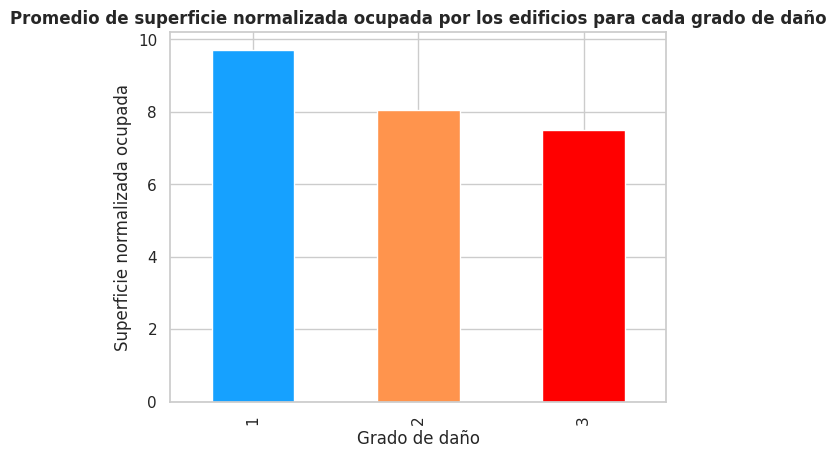

In [ ]:
f = plt.figure()
plt.title('Promedio de superficie normalizada ocupada por los edificios para cada grado de daño', {'fontweight':'bold'})

means['area_percentage'].plot(kind='bar', ax=f.gca(),color=['#16a1ff', '#ff944d', 'red'], ylabel='Superficie normalizada ocupada', xlabel='Grado de daño')

plt.savefig('area.pdf', bbox_inches='tight')

##Otras comparaciones

In [ ]:
more_affected = mean_damage.transpose().nlargest(5, columns=[3])

In [ ]:
more_affected_zones = more_affected.index

In [ ]:
columns = ['geo_level_1_id', 'age', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag']

means = full.loc[full['geo_level_1_id'].isin(more_affected_zones.to_list())][columns].groupby('geo_level_1_id').mean()

means['general_mean_age'] = train_values['age'].mean()
means['general_mean_adobe_mud'] = train_values['has_superstructure_adobe_mud'].mean()
means['general_mean_stone_mud'] = train_values['has_superstructure_mud_mortar_stone'].mean()
means['general_mean_stone'] = train_values['has_superstructure_stone_flag'].mean()


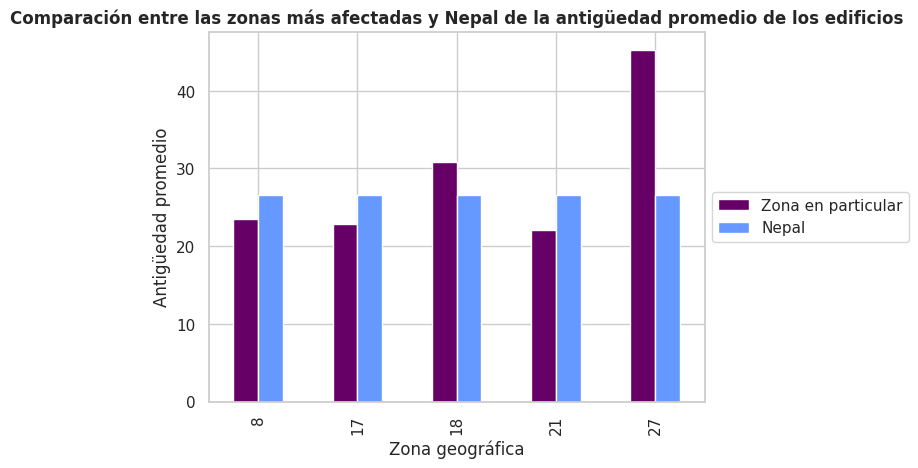

In [ ]:
mean_age = means[['age', 'general_mean_age']].rename(columns = {'age': 'Zona en particular', 'general_mean_age':'Nepal'})

f = plt.figure()
plt.title('Comparación entre las zonas más afectadas y Nepal de la antigüedad promedio de los edificios' , {'fontweight':'bold'})

mean_age.plot(kind='bar', ax=f.gca(), ylabel='Antigüedad promedio', xlabel='Zona geográfica', color=['#660066', '#6699ff'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('age_comparison.pdf', bbox_inches='tight')

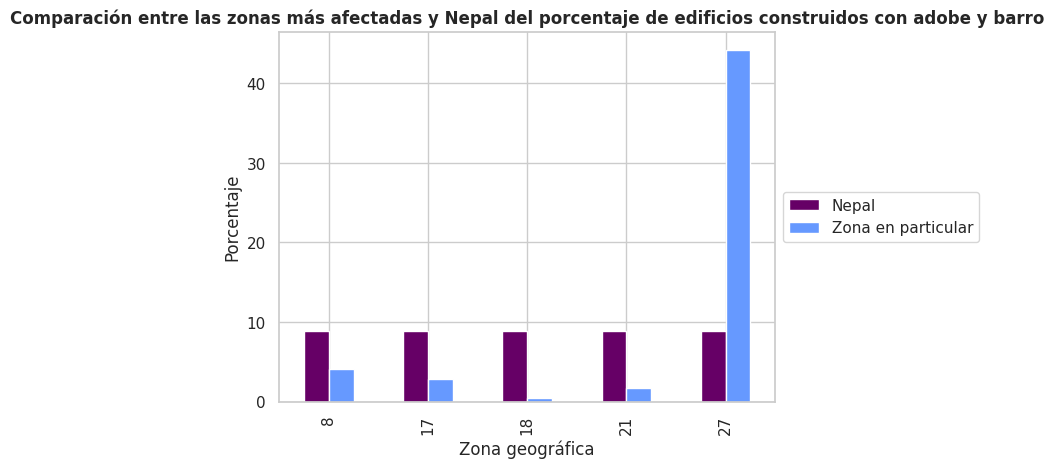

In [ ]:
mean_adobe_mud = means[['general_mean_adobe_mud', 'has_superstructure_adobe_mud']].rename(columns = {'general_mean_adobe_mud': 'Nepal', 'has_superstructure_adobe_mud':'Zona en particular'})

mean_adobe_mud = mean_adobe_mud.transform(lambda x: x*100)

f = plt.figure()
plt.title('Comparación entre las zonas más afectadas y Nepal del porcentaje de edificios construidos con adobe y barro' , {'fontweight':'bold'})

mean_adobe_mud.plot(kind='bar', ax=f.gca(), ylabel='Porcentaje', xlabel='Zona geográfica', color=['#660066', '#6699ff'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('adobe_mud_comparison.pdf', bbox_inches='tight')

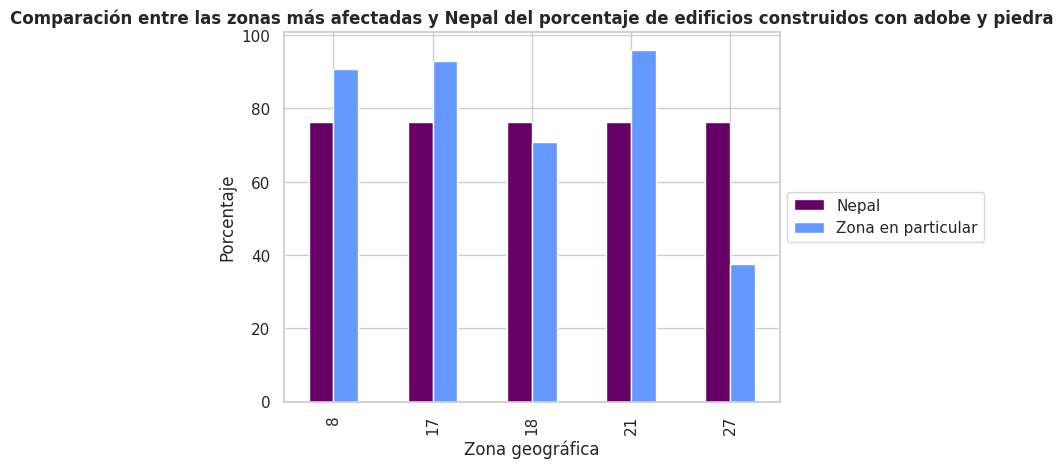

In [ ]:
mean_stone_mud = means[['general_mean_stone_mud', 'has_superstructure_mud_mortar_stone']].rename(columns = {'general_mean_stone_mud': 'Nepal', 'has_superstructure_mud_mortar_stone':'Zona en particular'})

mean_stone_mud = mean_stone_mud.transform(lambda x: x*100)

f = plt.figure()
plt.title('Comparación entre las zonas más afectadas y Nepal del porcentaje de edificios construidos con adobe y piedra' , {'fontweight':'bold'})

mean_stone_mud.plot(kind='bar', ax=f.gca(), ylabel='Porcentaje', xlabel='Zona geográfica', color=['#660066', '#6699ff'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('adobe_stone_comparison.pdf', bbox_inches='tight')

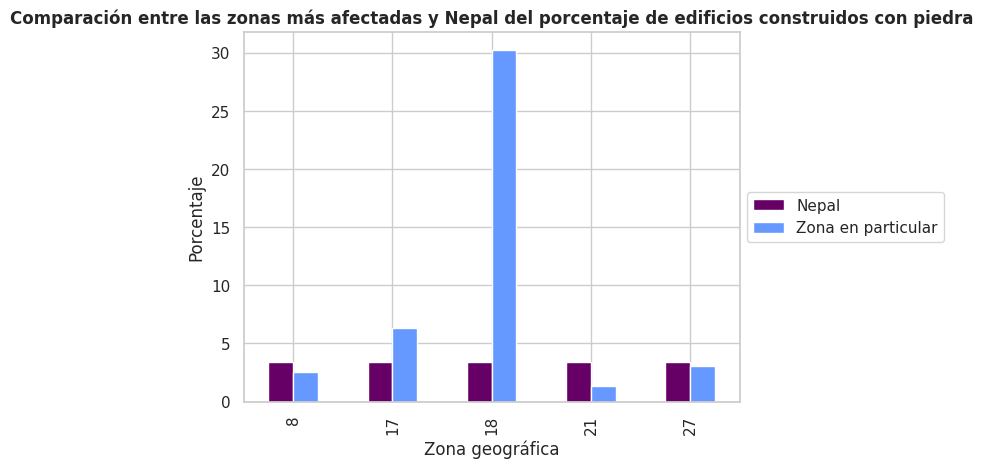

In [ ]:
mean_stone = means[['general_mean_stone', 'has_superstructure_stone_flag']].rename(columns = {'general_mean_stone': 'Nepal', 'has_superstructure_stone_flag':'Zona en particular'})

mean_stone = mean_stone.transform(lambda x: x*100)

f = plt.figure()
plt.title('Comparación entre las zonas más afectadas y Nepal del porcentaje de edificios construidos con piedra' , {'fontweight':'bold'})

mean_stone.plot(kind='bar', ax=f.gca(), ylabel='Porcentaje', xlabel='Zona geográfica', color=['#660066', '#6699ff'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('stone_comparison.pdf', bbox_inches='tight')



```
# Tiene formato de código
```

## Desvios estandar

In [ ]:
antiguedad_filtrada = full[numerical_columns]
antiguedad_filtrada = antiguedad_filtrada[(full['age'] < 200)]
antiguedad_filtrada.std()

age                                  19.27
count_floors_pre_eq                   0.73
area_percentage                       4.39
height_percentage                     1.92
dtype: float64

In [ ]:
full.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,"260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00"
mean,"525,675.48",13.90,701.07,"6,257.88",2.13,26.54,8.02,5.43,0.09,0.76,0.03,0.02,0.07,0.08,0.25,0.09,0.04,0.02,0.01,0.98,0.11,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,2.24
std,"304,545.00",8.03,412.71,"3,646.37",0.73,73.57,4.39,1.92,0.28,0.43,0.18,0.13,0.25,0.26,0.44,0.28,0.20,0.12,0.12,0.42,0.32,0.25,0.18,0.09,0.03,0.02,0.03,0.01,0.01,0.01,0.07,0.61
min,4.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"261,190.00",7.00,350.00,"3,073.00",2.00,10.00,5.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,"525,757.00",12.00,702.00,"6,270.00",2.00,15.00,7.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
75%,"789,762.00",21.00,"1,050.00","9,412.00",2.00,30.00,9.00,6.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,"1,052,934.00",30.00,"1,427.00","12,567.00",9.00,995.00,100.00,32.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00
